#Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Set path
path = r'/Users/corinagugulus/Achievement 6/'

In [4]:
# Import the df_profile data

df = pd.read_csv(os.path.join(path, 'Prepared Data','df_profile.csv'), index_col = False, low_memory = False)

#Data Cleaning

In [5]:
df.columns

Index(['ID_Python', 'ID', 'Amenities', 'Bathrooms', 'Bedrooms', 'Currency',
       'Fee', 'Has_Photo', 'Pets_Allowed', 'Price', 'Price_Display',
       'Price_Type', 'Square_Feet', 'Address', 'Cityname', 'State', 'Latitude',
       'Longitude', 'Source', 'Time'],
      dtype='object')

In [6]:
#Dropping ID, Currency, Price_Display, Price_Type, Address, Time columns because they are not needed for analysis
df.drop(['ID_Python','ID','Currency', 'Price_Display', 'Price_Type', 'Address', 'Time', 'Cityname'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['Amenities', 'Bathrooms', 'Bedrooms', 'Fee', 'Has_Photo',
       'Pets_Allowed', 'Price', 'Square_Feet', 'State', 'Latitude',
       'Longitude', 'Source'],
      dtype='object')

In [8]:
df.head(20)

,Amenities,Bathrooms,Bedrooms,Fee,Has_Photo,Pets_Allowed,Price,Square_Feet,State,Latitude,Longitude,Source
0,Garbage Disposal Pool,2,0,NaN,Thumbnail,NaN,1,0,NaN,NaN,NaN,NaN
1,please do not ask On site full service propert...,2,0,NaN,Yes,NaN,1,0,NaN,NaN,NaN,NaN
2,one bathrooms on 1 1/2 floors. The loft bedroo...,1,0,NaN,No,NaN,1,0,NaN,NaN,NaN,NaN
3,ParkingPool,1,0,NaN,No,NaN,1,0,NaN,NaN,NaN,NaN
4,Two BR One BA;Rare find beautiful update 2BD/o...,1,2,NaN,Yes,NaN,1,0,NaN,NaN,NaN,NaN
5,Natural Gas. Cooling: Central Air.;ACWasher Dryer,1,0,NaN,Yes,NaN,1,0,NaN,NaN,NaN,NaN
6,laundry machines and being so conveniently loc...,2,0,NaN,No,NaN,1,0,NaN,NaN,NaN,NaN
7,beautiful 2 beds unit on the 3rd floor in a mu...,2,0,NaN,Yes,NaN,1,0,NaN,NaN,NaN,NaN
8,Wall A/C Parking: Carport Parking for 1 Rent: ...,1,0,NaN,No,NaN,1,0,NaN,NaN,NaN,NaN
9,Coral Gables and the greater Miami Area. Prope...,2,0,NaN,Yes,NaN,1,0,NaN,NaN,NaN,NaN


In [9]:
df.shape

(99117, 12)

Missing Values

In [10]:
#Check for missing values
df.isnull().sum() 

Amenities         166
Bathrooms           0
Bedrooms            0
Fee             94660
Has_Photo       94258
Pets_Allowed    96811
Price               0
Square_Feet         0
State           97982
Latitude        98814
Longitude       97985
Source          97992
dtype: int64

Addressing missing values

In [11]:
# Create a subset, df_nan_fee, to view missing values in 'Fee' column
df_nan_fee = df[df['Fee'].isnull() == True]

In [12]:
#Create subset without missing 'fee' value
df_F = df[df['Fee'].isnull() == False]

In [13]:
df_F

,Amenities,Bathrooms,Bedrooms,Fee,Has_Photo,Pets_Allowed,Price,Square_Feet,State,Latitude,Longitude,Source
56,Mount Airy21771,1,1,No,Thumbnail,NaN,200,250,Maryland,39.39,-77.15,RentLingo
57,One BA safe neighborhood;20 x 40 Storage Unit ...,1,0,No,Yes,NaN,200,800,Arkansas,35.28,-93.14,RentDigs.com
60,One time $75 Dogs - one allowed Max weight 80 ...,1,2,No,Yes,NaN,313,880,Colorado,NaN,-104.82,RentDigs.com
61,One BA;CUTE LITTLE 1 BEDs / 1 BATHROOMs UPSTAI...,1,1,No,No,NaN,350,600,Arkansas,NaN,-92.26,RentDigs.com
62,bright gas stove,1,0,No,Yes,NaN,375,400,Ohio,NaN,-84.57,RentDigs.com
...,...,...,...,...,...,...,...,...,...,...,...,...
7934,washer-dryer hook ups appliances,2,3,No,Yes,Cats,0,0,NaN,NaN,NaN,NaN
7963,Two BA Loft: Herndon VA 20171;Where elegance m...,2,2,No,Thumbnail,Cats,0,0,NaN,NaN,NaN,NaN
7965,Four BR One BA for rent. Dog OK!;Freshly Renov...,1,4,No,Yes,Cats,0,0,NaN,NaN,NaN,NaN
7966,550/mo + $50/mo pet rent second Ave Lofts &#38...,1,1,No,Thumbnail,Cats,0,0,NaN,NaN,NaN,NaN


In [14]:
# Create a subset, df_nan_State, to view missing values in 'name' column
df_s = df_F[df_F['State'].isnull() == True]

In [15]:
#Create subset without missing 'state' values
df_state = df_F[df_F['State'].isnull() == False]

In [16]:
# Create a subset, df_nan_Pets, to view missing values in 'Pets_Allowed' column
df_p = df_state[df_state['Pets_Allowed'].isnull() == True]

In [17]:
#Create subset without missing 'Pets_Allowed' values
df_Pets = df_state[df_state['Pets_Allowed'].isnull() == False]

In [18]:
df_profile_pr = df_Pets

In [19]:
#Checking for NaN
df_profile_pr.isnull().sum()

Amenities        0
Bathrooms        0
Bedrooms         0
Fee              0
Has_Photo        0
Pets_Allowed     0
Price            0
Square_Feet      0
State            0
Latitude        65
Longitude        0
Source           0
dtype: int64

In [32]:
#Dropping Latitude and Longitude columns because they are not needed for analysis
df_profile_pr.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)

/var/folders/7l/v6xh6dn569ggk_lvnn8q6_q40000gn/T/ipykernel_75035/3138659636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profile_pr.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)


In [20]:
df_profile_pr

,Amenities,Bathrooms,Bedrooms,Fee,Has_Photo,Pets_Allowed,Price,Square_Feet,State,Latitude,Longitude,Source
91,offering the simple expected comforts of spaci...,1,1,No,Yes,Cats,475,558,Ohio,NaN,-84.20,RentDigs.com
128,lots of closet space eat in kitchens with on s...,1,1,No,Yes,Cats,525,530,Iowa,NaN,-91.67,RentDigs.com
145,on site washer / dryer area in the basement. C...,1,0,No,Thumbnail,Cats,550,402,North Carolina,NaN,-79.77,RentDigs.com
166,Church Hill37642,1,1,No,Thumbnail,Cats,575,680,Tennessee,NaN,-82.70,RentLingo
175,bright gas stove,1,1,No,Thumbnail,Cats,575,650,Nebraska,NaN,-96.05,RentDigs.com
...,...,...,...,...,...,...,...,...,...,...,...,...
1108,Austin78703,1,0,No,Thumbnail,Cats,975,400,Texas,NaN,-97.75,RentLingo
1114,the market average ranges from $925 to $1 370 ...,2,2,No,No,Cats,975,1080,Virginia,NaN,-77.39,RentDigs.com
1128,South St. Paul55075,1,1,No,Thumbnail,Cats,979,715,Minnesota,NaN,-93.04,RentLingo
1156,Louisville44641,2,2,No,Thumbnail,Cats,995,1400,Ohio,40.85,-81.26,RentLingo


In [21]:
#Last Check for NaN
df_profile_pr.isnull().sum()

Amenities        0
Bathrooms        0
Bedrooms         0
Fee              0
Has_Photo        0
Pets_Allowed     0
Price            0
Square_Feet      0
State            0
Latitude        65
Longitude        0
Source           0
dtype: int64

In [22]:
df_profile_pr.shape

(80, 12)

Duplicates check

In [23]:
dups = df_profile_pr.duplicated()

In [24]:
dups.shape # no dups

(80,)

Extreme values checks

/var/folders/7l/v6xh6dn569ggk_lvnn8q6_q40000gn/T/ipykernel_16499/3061385095.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_profile_pr['Price'], bins=25) # Shows extreme values


<Axes: xlabel='Price', ylabel='Density'>

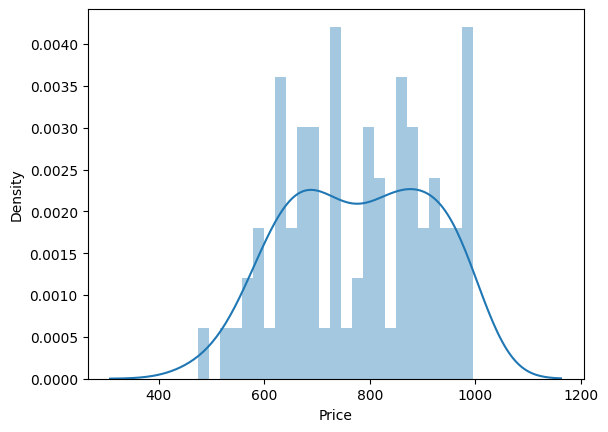

In [25]:
sns.distplot(df_profile_pr['Price'], bins=25) # Shows extreme values

In [26]:
df_profile_pr['Price'].mean() # Check the mean

779.7875

In [27]:
df_profile_pr['Price'].median() # Check the median

792.5

In [28]:
df_profile_pr['Price'].max() # Check the max

995

#Data Prep for Regression Analysis

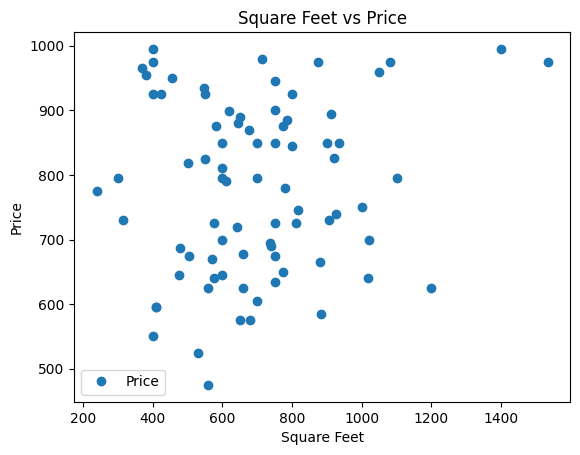

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_profile_pr.plot(x = 'Square_Feet', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Square Feet vs Price')  
plt.xlabel('Square Feet')  
plt.ylabel('Price')  
plt.show()

# Hyphotesis: The bigger the size of an apartment or house is the higher the price. 

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_profile_pr['Square_Feet'].values.reshape(-1,1)
y = df_profile_pr['Price'].values.reshape(-1,1)

In [31]:
X

array([[ 558],
       [ 530],
       [ 402],
       [ 680],
       [ 650],
       [ 882],
       [ 410],
       [ 410],
       [ 700],
       [ 560],
       [ 660],
       [1200],
       [ 750],
       [ 576],
       [1018],
       [ 475],
       [ 600],
       [ 775],
       [ 880],
       [ 570],
       [ 505],
       [ 750],
       [ 660],
       [ 479],
       [ 740],
       [ 737],
       [1022],
       [ 600],
       [ 641],
       [ 750],
       [ 810],
       [ 576],
       [ 315],
       [ 906],
       [ 925],
       [ 816],
       [1000],
       [ 240],
       [ 780],
       [ 611],
       [ 600],
       [ 700],
       [1100],
       [ 300],
       [ 600],
       [ 500],
       [ 550],
       [ 920],
       [ 800],
       [ 936],
       [ 700],
       [ 600],
       [ 750],
       [ 900],
       [ 676],
       [ 583],
       [ 775],
       [ 645],
       [ 784],
       [ 650],
       [ 912],
       [ 620],
       [ 750],
       [ 425],
       [ 400],
       [ 550],
       [ 8

In [32]:
y

array([[475],
       [525],
       [550],
       [575],
       [575],
       [585],
       [595],
       [595],
       [605],
       [625],
       [625],
       [625],
       [635],
       [640],
       [641],
       [645],
       [645],
       [650],
       [665],
       [670],
       [674],
       [675],
       [678],
       [687],
       [690],
       [695],
       [700],
       [700],
       [720],
       [725],
       [725],
       [725],
       [730],
       [730],
       [740],
       [745],
       [750],
       [775],
       [780],
       [790],
       [795],
       [795],
       [795],
       [795],
       [810],
       [819],
       [825],
       [826],
       [845],
       [850],
       [850],
       [850],
       [850],
       [850],
       [870],
       [875],
       [875],
       [880],
       [885],
       [890],
       [895],
       [899],
       [900],
       [925],
       [925],
       [925],
       [925],
       [935],
       [945],
       [950],
       [955],
      

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Regression Analysis

In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

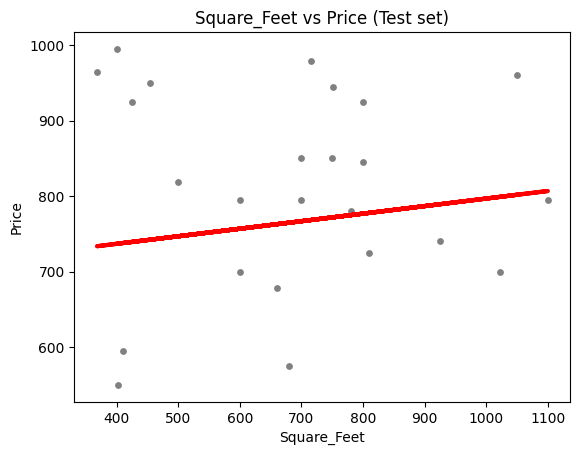

In [45]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Square_Feet vs Price (Test set)')
plot_test.xlabel('Square_Feet')
plot_test.ylabel('Price')
plot_test.show()


In [46]:
plt.savefig('regression line.png')

<Figure size 640x480 with 0 Axes>

## The data points are not clustered together and closed to the line. This shows that there is no direct relationship between the square feet and price. 

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [48]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09992332]]
Mean squared error:  19217.56406718577
R2 score:  -0.14599072121936407


In [49]:
y_predicted

array([[766.86075263],
       [756.86842055],
       [777.8523179 ],
       [768.35960244],
       [746.87608848],
       [801.83391488],
       [776.8530847 ],
       [771.95684198],
       [776.8530847 ],
       [742.27961573],
       [756.86842055],
       [739.38183943],
       [737.08360305],
       [733.68621015],
       [771.85691866],
       [789.34349979],
       [764.86228621],
       [762.8638198 ],
       [737.88298962],
       [799.0360619 ],
       [806.83008091],
       [774.85461828],
       [766.86075263],
       [736.88375641]])

In [50]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,850,766.860753
1,700,756.868421
2,725,777.852318
3,979,768.359602
4,819,746.876088
5,960,801.833915
6,925,776.853085
7,945,771.956842
8,845,776.853085
9,950,742.279616


#Compare how the regression fits the training set

In [51]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09992332]]
Mean squared error:  16947.455954341403
R2 score:  0.03476371019439173


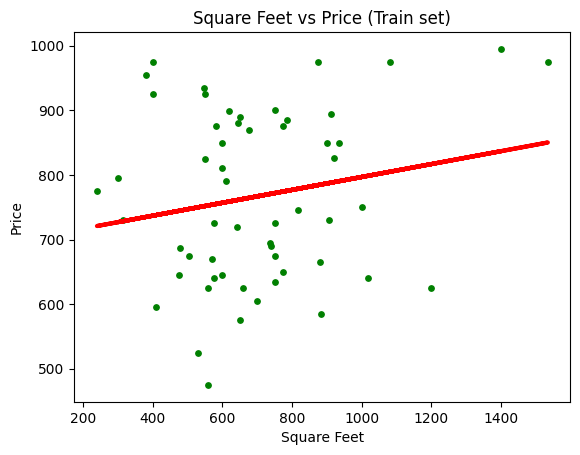

In [54]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Square Feet vs Price (Train set)')
plot_test.xlabel('Square Feet')
plot_test.ylabel('Price')
plot_test.show()

## By looking at the MSE (Mean squared error) and R2 score values we can say that the model isn't performing well. By looking at the actual and predicted values of y we have the confirmation that the model is not doing a good job of explaining the relationship between the size of an apartment/house (square feet) and price. The relationship doesn't follow a simple, straight regression line. 

In [ ]:
g.savefig("out.png")